Amit Talapatra, 10/24/16

# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 03:36:24--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.1s   

2016-10-24 03:36:25 (45.7 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

-------------------------------------------------------------------
First, I used csvcut to print the indexes and names of each column.

In [2]:
!csvcut -n abq-food-inspections-fy2010.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


I wanted to see how many rows are in the dataset to get a sense of the volume of the data.

In [3]:
!wc -l abq-food-inspections-fy2010.csv

17557 abq-food-inspections-fy2010.csv


I used csvstat to see some statistics on each column and identify some of the common values in each.
This showed that SITE_ADDRESS, NATURE_OF_BUSINESS, STREET_NUMBER, STREET_NAME, STREET_TYPE, POST_DIRECTIONAL, PHONE, PROGRAM_CATEGORY_DESCRIPTION, INSPECTION_TYPE, VIOLATION_CODE, VIOLATION_DESC, and INSPECTION_MEMO.

In [4]:
!csvstat abq-food-inspections-fy2010.csv

  1. FACILITY_NAME
	<class 'str'>
	Nulls: False
	Unique values: 2615
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ECHO INC:	68
		ISLETA AMPHITHEATER:	68
	Max length: 77
  2. FACILITY_KEY
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 820405773
	Mean: 46730.79135338346
	Median: 50866.0
	Standard Deviation: 32659.794578837962
	Unique values: 2835
	5 most frequent values:
		46323:	93
		65863:	85
		80949:	68
		32817:	68
		91825:	66
  3. SITE_ADDRESS
	<class 'str'>
	Nulls: True
	Unique values: 2456
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. CITY
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. STATE
	<class 'str'>
	Nulls: False
	Values: NM, 87
  6. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most frequent values:
		87110

From the metadata, the column meanings are:

FACILITY_NAME: Name of the facility where the inspection occurred  
FACILITY_KEY: ID of the facility where the inspection occurred  
SITE_ADDRESS: Street address of the facility where the inspection occurred  
CITY: City of the facility where the inspection occurred  
STATE: State of the facility where the inspection occurred  
ZIP: Zip of the facility where the inspection occurred  
OWNER_KEY: ID of the Owner of the facility where the inspection occurred at the time of the inspection  
OWNER_NAME: Name of the Owner of the facility where the inspection occurred at the time of the inspection  
NATURE_OF_BUSINESS: The type of business, originally for internal use only, provides information about the business. This is not the information provided on the federal tax form.  
STREET_NUMBER: Street number of the facility where the inspection occurred  
STREET_NAME: Street name of the facility where the inspection occurred  
STREET_TYPE: Street type of the facility where the inspection occurred  
POST_DIRECTIONAL: Postal direction of the facility where the inspection occurred  
PHONE: Phone number of the facility where the inspection occurred  
PROGRAM_CATEGORY: Id that indicates the type of facility permit the inspection was performed  
PROGRAM_CATEGORY_DESCRIPTION: Descript of the id that indicates the type of facility permit the inspection was performed  
INSPECTION_DATE: Date the inspection occurred  
INSPECTION_TYPE: Code for type of inspection  
INSPECTION_DESC: Description of the inspection  
SERIAL_NUM: Unique ID for the inspection daily activity. This is a sequential number assigned chronologically as the data is entered into the system. If there are multiple rows with the same OWNER_ID and INSPECTION_DATE and SERIAL_NUM, it means that there were multiple rows created for one inspection (multiple results were recorded). If there are multiple rows with the same OWNER_ID and INSPECTION_DATE and a different SERIAL_NUM, it means that there were multiple inspections taken on the same day and the highest SERIAL_NUM is intended to be the most recent inspection  
ACTION_CODE: Code of the action taken. If the ACTION_CODE is equal to 00 – NON-GRADED this indicates that the inspector was unable to actually perform an inspection. The RESULT_CODE documents the situation  
ACTION_DESC: Description of the action taken  
RESULT_CODE: Code of the result of the inspection  
RESULT_DESC: Description of the result of the inspection  
VIOLATION_CODE: The code for the violation   
VIOLATION_DESC(NVL(SNV, VD): Description of the violation that was found  
INSPECTION_MEMO: Notes from the inspection made by the inspector  

FACILITY_NAME/FACILITY_KEY will be useful for identifying individual facilities. I'm interested in seeing the relationships between features like NATURE_OF_BUSINESS, PROGRAM_CATEGORY_DESCRIPTION, INSPECTION_DESC, ACTION_DESC, RESULT_DESC, and VIOLATION_DESC. To see how these features differ by location, the ZIP column may be a useful way of grouping facilities.

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

-------------------------------------------------------------------
First, I created the database in PostgreSQL.

In [5]:
%load_ext sql
!echo 'redspot' | sudo -S service postgresql restart
!createdb -U dbuser ABQFood
%sql postgresql://dbuser@localhost:5432/ABQFood

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


'Connected: dbuser@ABQFood'

Next, I set up the table in the database that I would be transferring my data into.

In [6]:
%%sql
DROP TABLE IF EXISTS ABQFood;
CREATE TABLE ABQFood (
    facility_name VARCHAR(100),
    facility_key INTEGER,
    site_address VARCHAR(64),
    city VARCHAR(64),
    state VARCHAR(64),
    zipcode VARCHAR(64),
    owner_key INTEGER,
    owner_name VARCHAR(100),
    nature_of_business VARCHAR(64),
    street_number VARCHAR(64),
    street_name VARCHAR(64),
    street_type VARCHAR(64),
    post_directional VARCHAR(64),
    phone VARCHAR(64),
    program_category VARCHAR(64),
    program_category_description VARCHAR(64),
    inspection_date TIMESTAMP,
    inspection_type VARCHAR(64),
    inspection_desc VARCHAR(64),
    serial_num VARCHAR(64),
    action_code VARCHAR(64),
    action_desc VARCHAR(64),
    result_code VARCHAR(64),
    result_desc VARCHAR(64),
    violation_code VARCHAR(64),
    violation_desc VARCHAR(64),
    inspection_memo VARCHAR(64)
)

Done.
Done.


[]

I then loaded the data from the csv file into the database table.

In [7]:
%%sql
COPY ABQFood FROM '/home/jovyan/work/abq-food-inspections-fy2010.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

I used COUNT(*) to verify that all of the rows were loaded into the table correctly.

In [8]:
%%sql
SELECT COUNT(*) FROM ABQFood;

1 rows affected.


count
17556


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

---------------------------------------------------------------------
FACILITY_NAME/FACILITY_KEY will be useful for identifying individual facilities. I'm interested in seeing the relationships between features like NATURE_OF_BUSINESS, PROGRAM_CATEGORY_DESCRIPTION, INSPECTION_DESC, ACTION_DESC, RESULT_DESC, and VIOLATION_DESC. To see how these features differ by location, the ZIP column may be a useful way of grouping facilities.

To start, I wanted to view some of the data to verify that cell contents are formatted correctly for each column.

This cell is also a useful way to check that changes to the table are implemented correctly, so I run it after each transformation that I want to check.

In [49]:
%%sql
SELECT *
FROM abqfood
LIMIT 10;

10 rows affected.


facility_name,facility_key,site_address,city,state,zipcode,owner_key,owner_name,nature_of_business,street_number,street_name,street_type,post_directional,phone,program_category,program_category_description,inspection_date,inspection_type,inspection_desc,serial_num,action_code,action_desc,result_code,result_desc,violation_code,violation_desc,inspection_memo,year,month,day,altered_zip
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None,2009,10,21,87114
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None,2010,4,14,87114
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None,2010,4,14,87114
2000 VIETNAM RESTAURANT,31468,601 SAN MATEO BLVD SE,ALBUQUERQUE,NM,87108,29294,2000 VIETMAN RESTAURANT,RESTAURANT,601,SAN MATEO,BLVD,SE,5052320900,0406,Food Service Establishment,2010-03-23 00:00:00,None,ROUTINE FOOD INSPECTION,DA8509472,11,APPROVED,03,IN COMPLIANCE,34,Food contact surfaces,None,2010,3,23,87108
2000 VIETNAM RESTAURANT,31468,601 SAN MATEO BLVD SE,ALBUQUERQUE,NM,87108,29294,2000 VIETMAN RESTAURANT,RESTAURANT,601,SAN MATEO,BLVD,SE,5052320900,0406,Food Service Establishment,2010-03-23 00:00:00,None,ROUTINE FOOD INSPECTION,DA8509472,11,APPROVED,03,IN COMPLIANCE,35,Non-Food contact surfaces,None,2010,3,23,87108
2000 VIETNAM RESTAURANT,31468,601 SAN MATEO BLVD SE,ALBUQUERQUE,NM,87108,29294,2000 VIETMAN RESTAURANT,RESTAURANT,601,SAN MATEO,BLVD,SE,5052320900,0406,Food Service Establishment,2010-03-23 00:00:00,None,ROUTINE FOOD INSPECTION,DA8509472,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None,2010,3,23,87108
328 CHINESE CUISINE,72789,5617 MENAUL BLVD NE STE A,ALBUQUERQUE,NM,87110,66644,328 CHINESE CUISINE,None,5617,MENAUL,BLVD,NE,5058814468,0406,Food Service Establishment,2009-12-15 00:00:00,None,EMERGENCY RESPONSE,DA7757250,00,NON-GRADED,00,NOT APPLICABLE,68,Delivered Informational Brochure,None,2009,12,15,87110
328 CHINESE CUISINE,72789,5617 MENAUL BLVD NE STE A,ALBUQUERQUE,NM,87110,66644,328 CHINESE CUISINE,None,5617,MENAUL,BLVD,NE,5058814468,0406,Food Service Establishment,2009-12-15 00:00:00,None,ROUTINE FOOD INSPECTION,DA7757248,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None,2009,12,15,87110
328 CHINESE CUISINE,72789,5617 MENAUL BLVD NE STE A,ALBUQUERQUE,NM,87110,66644,328 CHINESE CUISINE,None,5617,MENAUL,BLVD,NE,5058814468,0406,Food Service Establishment,2009-12-15 00:00:00,None,ROUTINE FOOD INSPECTION,DA7757248,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None,2009,12,15,87110
328 CHINESE CUISINE,72789,5617 MENAUL BLVD NE STE A,ALBUQUERQUE,NM,87110,66644,328 CHINESE CUISINE,None,5617,MENAUL,BLVD,NE,5058814468,0406,Food Service Establishment,2010-05-03 00:00:00,None,ROUTINE FOOD INSPECTION,DA7758349,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None,2010,5,3,87110


The next set of cells applies a transformation to split the inspection_date into year, month, and day. These are then added to the table as three separate columns.

In [10]:
%%sql
ALTER TABLE abqfood
ADD COLUMN year NUMERIC;

Done.


[]

In [11]:
%%sql
ALTER TABLE abqfood
ADD COLUMN month NUMERIC;

Done.


[]

In [12]:
%%sql
ALTER TABLE abqfood
ADD COLUMN day NUMERIC;

Done.


[]

In [13]:
%%sql
UPDATE abqfood
SET year = EXTRACT(YEAR FROM inspection_date), 
    month = EXTRACT(MONTH FROM inspection_date),
    day = EXTRACT(DAY FROM inspection_date);

17556 rows affected.


[]

Next, I plotted the number of inspections over time, using the newly created year and month columns.

In [14]:
%%sql
SELECT year, month, COUNT(*) FROM abqfood
GROUP BY year, month
ORDER BY year, month ASC

12 rows affected.


year,month,count
2009,7,1693
2009,8,1440
2009,9,2030
2009,10,1678
2009,11,1706
2009,12,2084
2010,1,1453
2010,2,1336
2010,3,1552
2010,4,1250


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<Container object of 12 artists>

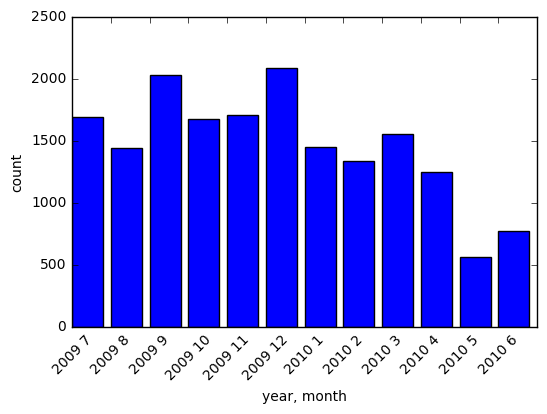

In [15]:
%matplotlib inline
result = _
result.bar()

The plot shows that significantly fewer inspections occured in some months. May 2010 was the least busy month in terms of inspections, the winter months had nearly 3-4 times as many inspections. From just this data set, there is too little information to tell whether this is an annual trend. For example, there is a significant difference in the number of inspections in July 2009 compared to June 2010 so it may be that the decline in inspections in the summer does not occur every year to the same extent.

Next, I wanted to see how certain features of a store correlate with the type of inspection and violation. I started by viewing all of the different inspection types, because it may be useful to filter the data by specific inspection types when looking at violations as violations may be specific to the type of inspection.

In [16]:
%%sql
SELECT inspection_desc, COUNT(*) FROM abqfood
GROUP BY inspection_desc

15 rows affected.


inspection_desc,count
New Business Inspection,1005
IMMINENT HEALTH HAZARD,36
MANAGERIAL ASSISTANCE,54
FIRE CALL,5
MOBILE UNIT FOOD INSPECTION,377
E-MAIL,1
PHONE CALL,247
PLAN REVIEW INSPECTION,4
COMPLAINT FOOD INSPECTION,1
PRE-OPENING FOOD INSPECTION,743


When counting each type of inspection/facility category pairing, we see that routine food inspections at food service establishments are the most common type of observation. When looking for consistent patterns in the data, it may be useful to limit investigations to this subset of inspections and types of facilities.

In [17]:
%%sql
SELECT inspection_desc, program_category_description, COUNT(*) FROM abqfood
GROUP BY inspection_desc, program_category_description

186 rows affected.


inspection_desc,program_category_description,count
ADDITIONAL SERVICE PROVIDED,Mobile Pre-Packaged,47
New Business Inspection,School,29
New Business Inspection,Meat Market,12
ADDITIONAL SERVICE PROVIDED,Seasonal Venue -Fixed Location,4
FOLLOW-UP DOCUMENTATION RECEIVED,Retail - Deli,1
ADDITIONAL SERVICE PROVIDED,Non School,9
FOLLOW-UP DOCUMENTATION RECEIVED,Institutional Kitchen,3
New Business Inspection,Limited Menu,18
EMERGENCY RESPONSE,Food Processor,57
FOOD FOLLOW-UP INSPECTION,Meat Market,4


I'm curious to see if this subset has any correlation between violation type and location. For this, I can look at the 'violation_desc' and 'zipcode' variables. First, I want to see how many zip codes there are in this dataset.

In [18]:
%%sql
SELECT zipcode FROM abqfood
GROUP BY zipcode

48 rows affected.


zipcode
87197
87106
87187
87114
871147005
87107
871101922
871084174
87100
871104973


Some of these zipcodes include detail beyond the first five digits. To make it easier to interpret data based on location, I want to remove the extra digits from some of these zipcodes so that I can sort the data only by the five-digit zip code classification.

In [47]:
%%sql
ALTER TABLE abqfood
ADD COLUMN altered_zip VARCHAR(64);

Done.


[]

In [48]:
%%sql
UPDATE abqfood
SET altered_zip = LEFT(zipcode , 5)

17556 rows affected.


[]

In [86]:
%%sql
SELECT altered_zip, violation_desc, COUNT(*) FROM abqfood
GROUP BY altered_zip, violation_desc
ORDER BY COUNT DESC

726 rows affected.


altered_zip,violation_desc,count
87110,Additional Comments,720
87109,Additional Comments,614
87108,Additional Comments,610
87102,Additional Comments,594
87106,Additional Comments,586
87107,Additional Comments,427
87112,Additional Comments,417
87111,Additional Comments,409
87114,Additional Comments,400
87109,No Violations Found,400


This shows us some of the most common zip code and violation pairings. Zip code 87110 seems to be of particular interest due to it's high counts of values for violations, or other details. This does not necesarilly mean that the zip code is worse than others. There may simply have a higher amount of restaurants in that area. I'm interested in getting a visual represenation of the breakdown of violations in that area.

In [95]:
%%sql
SELECT violation_desc, COUNT(*) FROM abqfood
WHERE altered_zip = '87110'
GROUP BY violation_desc
ORDER BY COUNT DESC
LIMIT 15

15 rows affected.


violation_desc,count
Additional Comments,720
No Violations Found,316
Delivered Informational Brochure,210
Plumbing: Improperly installed/maintained/supplied,89
None,80
Improper sanitizing,65
"Floors, Walls, Ceilings",65
Non-Food contact surfaces,55
Food contact surfaces,48
Food unprotected,46


<Container object of 15 artists>

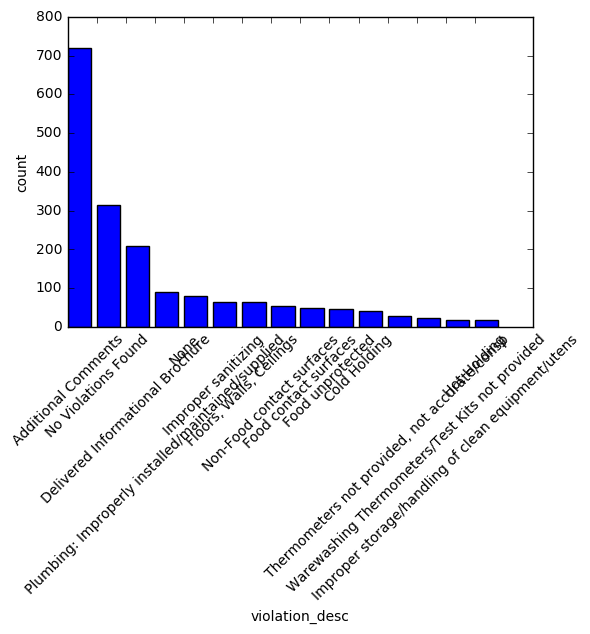

In [96]:
%matplotlib inline
result = _
result.bar()

This visual gives us a way to interpret the most common violations in an area. This could be a useful tool for targeting informational campaigns that teach facility owners how to address common violations.

## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table